In [6]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [4]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=3, linewidths=8,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(klasyfikator, X):
    # wyznaczanie granic decyzyjnych, podobnie jak w poprzednich notatnikach
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 100),
                         np.linspace(mins[1], maxs[1], 100))
    Z = klasyfikator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # rysowanie konturów granic
    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")

    # rysowanie danych
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    # centra klastrów można wyciągnąc za pomocą zmiennej cluster_centers_
    plot_centroids(klasyfikator.cluster_centers_)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [2]:
# środki naszych klastrów
centroids = np.array([
    [ 0.8, 2.0],
    [-0.5, 2.0],
    [-2.0, 2.0],
    [-2.5, 2.5],
    [-2.5, 1.0]
])

# wprowadzenie szumu do naszych klastrów, aby rozrzucić próbki
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# stworzenie zbioru danych
X, y = make_blobs(
    n_samples=3000,
    centers=centroids,
    cluster_std=blob_std,
    random_state=7
)

In [3]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=5)

# możemy użyć metod fit(), predict()
clf.fit(X)
y_pred = clf.predict(X)

# albo metody fit)predict, która łączy dwie powyższe
y_pred = clf.fit_predict(X)

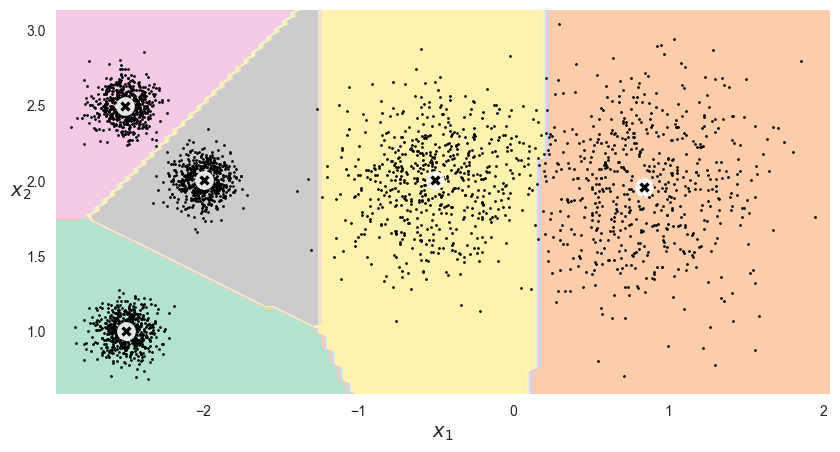

In [7]:
plt.figure(figsize=(10, 5))
plot_decision_boundaries(clf, X)
plt.show()

In [8]:
centroids = np.array([
    [ 0.8, 2.0],
    [-0.5, 2.0],
    [-2.0, 2.0],
    [-2.5, 2.5],
    [-2.5, 1.0]
])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

# 3 miliony punktów!!!
X, y = make_blobs(
    n_samples=30000000,
    centers=centroids,
    cluster_std=blob_std,
    random_state=7
)

In [9]:
from sklearn.cluster import MiniBatchKMeans

%timeit

# metoda MiniBatchKMeans
MBKMeans_clf = MiniBatchKMeans(n_clusters=5, max_iter=10, random_state=1)
MBKMeans_clf.fit(X)

,n_clusters,5
,init,'k-means++'
,max_iter,10
,batch_size,1024
,verbose,0
,compute_labels,True
,random_state,1
,tol,0.0
,max_no_improvement,10
,init_size,None
,n_init,'auto'


In [10]:
from sklearn.cluster import KMeans

%timeit

# metoda KMeans
KMeans_clf = KMeans(n_clusters=5, max_iter=10, random_state=1)
KMeans_clf.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,10
,tol,0.0001
,verbose,0
,random_state,1
,copy_x,True
,algorithm,'lloyd'


In [12]:
# tworzymy 19 algorytmów z k od 1 do 19
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=2).fit(X)
    for k in range(2, 20) # zaczynamy od wartości n_clusters wynoszącej 2, gdyż nie ma sensu dzielenia zbioru dla 1 klastra

]

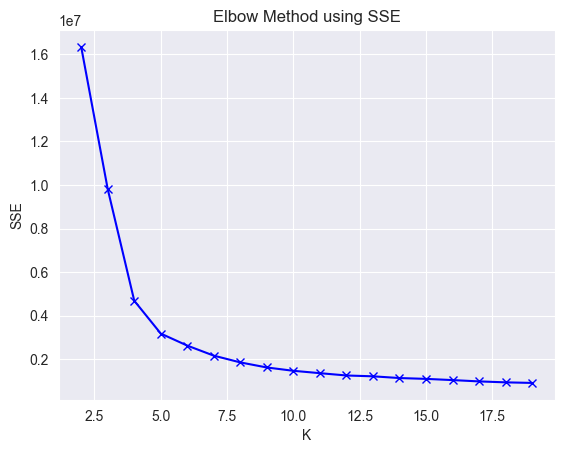

In [13]:
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(2, 20), inertias, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method using SSE')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [
    silhouette_score(X, model.labels_)
    for model in kmeans_per_k
]

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.ylabel("Silhouette score", fontsize=14)
plt.grid()
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
    train_test_split(X_digits, y_digits, random_state=2)

log_reg = LogisticRegression(multi_class="ovr", max_iter=5000, random_state=2)
log_reg.fit(X_train, y_train)

print("Bez KMeans :", log_reg.score(X_test, y_test))

pipeline = Pipeline([
    ("kmeans", KMeans(
        n_clusters=40,
        random_state=2
    )),
    ("log_reg", LogisticRegression(
        multi_class="ovr",
        max_iter=5000,
        random_state=2
    )),
])
pipeline.fit(X_train, y_train)

print("Z KMeans :", pipeline.score(X_test, y_test))

D:\ML_AI\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Bez KMeans : 0.9466666666666667


D:\ML_AI\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Z KMeans : 0.9577777777777777


In [16]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# tworzymy zbiór moon
X, y = make_moons(n_samples=1000, noise=0.08)

# tworzymy pierwszy klasyfikator DBSCAN z eps = 0.05
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

# drugi DBSCAN z eps = 0.2 (większy epsilon, większa przestrzeń wokół)
dbscan_2 = DBSCAN(eps=0.2, min_samples=5)
dbscan_2.fit(X)

,eps,0.2
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [19]:
def plot_dbscan(dbscan, X, size):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

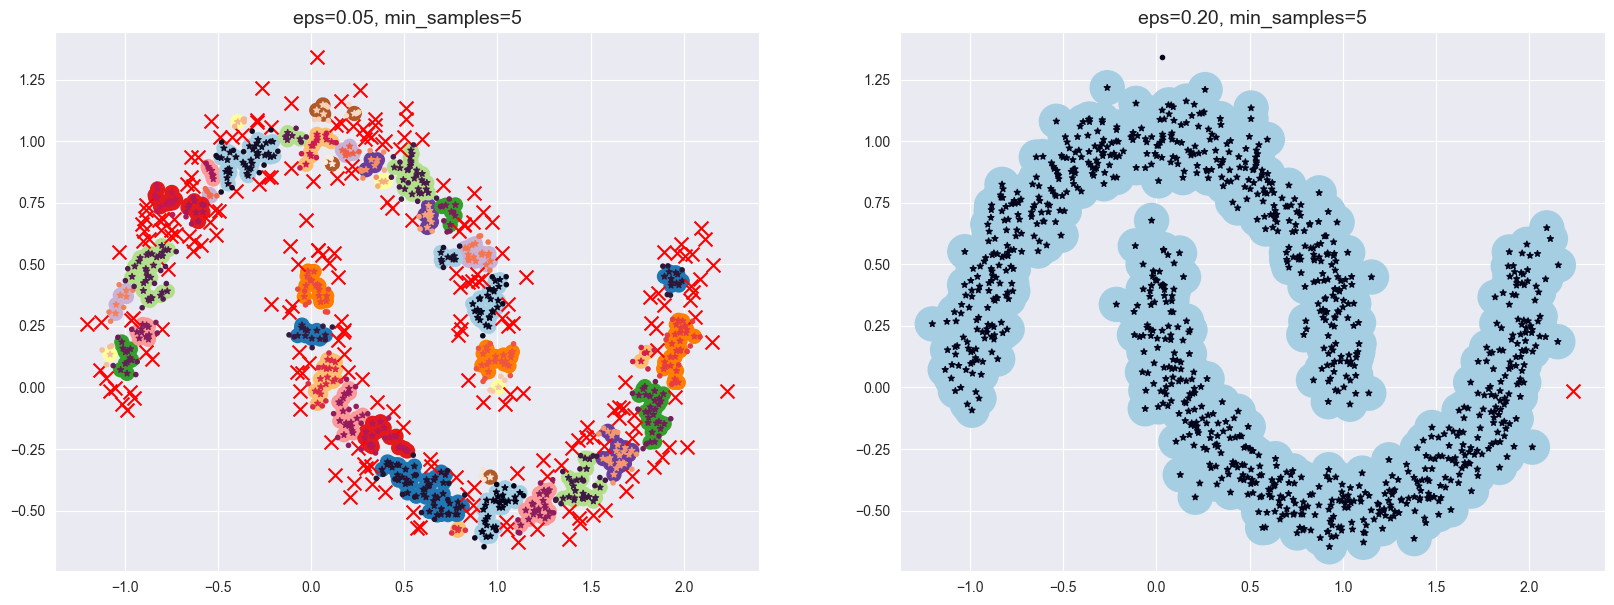

In [20]:
plt.figure(figsize=(20, 7))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan_2, X, size=600)

plt.show()

In [21]:
from sklearn.datasets import make_blobs
import numpy as np

# tworzymy "bloby", czyli grupy danych
X1, y1 = make_blobs(n_samples=800, centers=((2, -2), (-2, 2)), random_state=2)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=200, centers=1, random_state=42)
X2 = X2 + [6, -8]

# przydatna metoda NumPy r_ - służy do składania dwóch tablic wg wybranej osi
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [23]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# metoda zaporzyczona z przykładów sklearn oraz lekko zmodyfikowana zmodyfikowana
def plot_gaussian_mixture(clf, X, resolution=1000):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clf.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=3, colors='b')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    plt.xlabel("$x_1$", fontsize=14)
    plt.tick_params(labelleft=False)

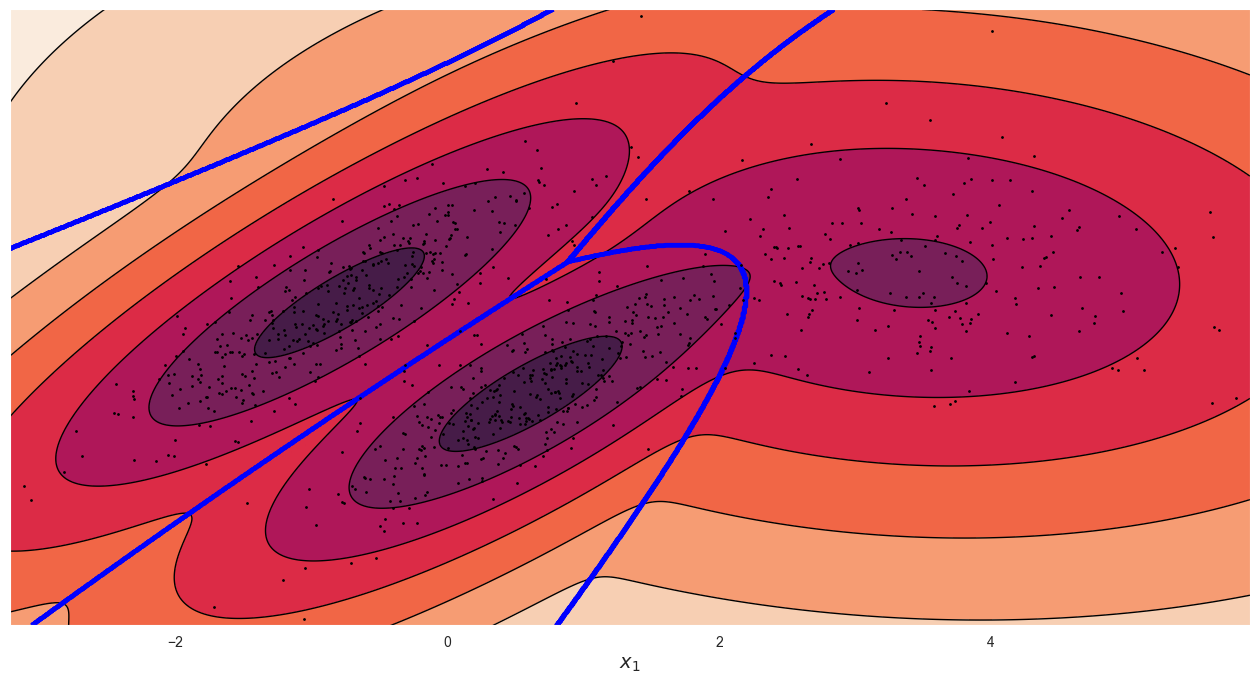

In [24]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

plt.figure(figsize=(16, 8))

plot_gaussian_mixture(gm, X)
plt.show()